# Inteligência Artificial e Aprendizado de Máquina

**Professor**: Francisco de Assis Boldt

**Aluno**: Evandro Canal Severgnini

**Data**: 05/02/2025

In [27]:
from sklearn.datasets import load_digits
import numpy as np

# Carrega o conjunto de dados MNIST (dígitos escritos à mão)
imagens_digitos, etiquetas_digitos = load_digits(return_X_y=True)

# Divide os dados em treinamento e teste (1.400 para treino, o restante para teste)
imagens_treino, etiquetas_treino = imagens_digitos[:1400], etiquetas_digitos[:1400]
imagens_teste, etiquetas_teste = imagens_digitos[1400:], etiquetas_digitos[1400:]

In [28]:
from sklearn.linear_model import LogisticRegression

# Define a quantidade de amostras rotuladas para o treinamento inicial
n_amostras_rotuladas = 50

# Inicializa o modelo de Regressão Logística
modelo_regressao_logistica = LogisticRegression(max_iter=10_000)

# Treina o modelo com as primeiras 50 imagens e etiquetas já definidas
modelo_regressao_logistica.fit(imagens_treino[:n_amostras_rotuladas], etiquetas_treino[:n_amostras_rotuladas])

LogisticRegression(max_iter=10000)

In [29]:
# Avalia o desempenho do modelo treinado no conjunto de teste
acuracia = modelo_regressao_logistica.score(imagens_teste, etiquetas_teste)

# Exibe a acurácia do modelo
print(f"Acurácia do modelo: {acuracia:.2%}")

Acurácia do modelo: 75.82%


In [30]:
# Inicializa o modelo de Regressão Logística treinado com todas as amostras de treino
modelo_regressao_logistica_completo = LogisticRegression(max_iter=10_000)

# Treina o modelo com todas as imagens rotuladas de treinamento
modelo_regressao_logistica_completo.fit(imagens_treino, etiquetas_treino)

# Avalia o desempenho do modelo treinado no conjunto de teste
acuracia_completa = modelo_regressao_logistica_completo.score(imagens_teste, etiquetas_teste)

# Exibe a acurácia do modelo treinado com todos os dados de treino
print(f"Acurácia do modelo completo: {acuracia_completa:.2%}")

Acurácia do modelo completo: 90.93%


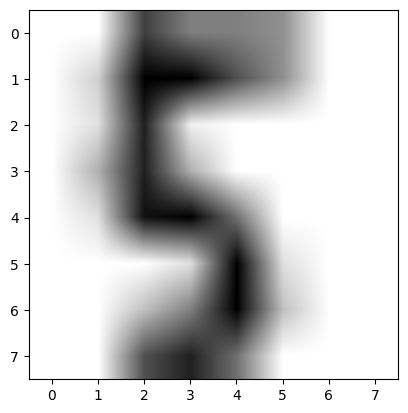

In [31]:
import matplotlib.pyplot as plt

# Exibir a imagem de um dos dígitos do conjunto de treinamento
plt.imshow(imagens_treino[25].reshape(8, 8), cmap='binary', interpolation="bilinear")

# Exibir o gráfico
plt.show()

In [32]:
from sklearn.cluster import KMeans

# Define o número de clusters (grupos)
num_grupos = 50

# Inicializa o modelo K-Means com random_state=27 para garantir reprodutibilidade
modelo_kmeans = KMeans(n_clusters=num_grupos, n_init="auto", random_state=27)

# Ajusta o modelo e transforma as imagens de treino em distâncias aos centróides
distancias_imagens = modelo_kmeans.fit_transform(imagens_treino)

# Obtém os índices das imagens mais representativas de cada cluster
indices_imagens_representativas = distancias_imagens.argmin(axis=0)

# Seleciona as imagens representativas dos clusters
imagens_representativas = imagens_treino[indices_imagens_representativas]

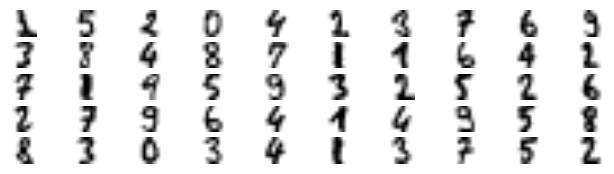

In [33]:
import matplotlib.pyplot as plt
import math

# Criar uma figura para exibir os dígitos representativos de cada cluster
plt.figure(figsize=(8, 2))

# Calcula o número de linhas da grade dinamicamente
num_linhas = math.ceil(num_grupos / 10)

# Percorre os índices e as imagens representativas
for indice, imagem_representativa in enumerate(imagens_representativas):
    plt.subplot(num_linhas, 10, indice + 1)
    plt.imshow(imagem_representativa.reshape(8, 8), cmap='binary', interpolation="bilinear")
    plt.axis("off")

# Exibir o gráfico
plt.show()

In [40]:
# Extrair os rótulos corretos das imagens representativas (baseado nos índices calculados pelo K-Means)
digitos_representativos = etiquetas_treino[indices_imagens_representativas]

# Exibir os primeiros 10 rótulos extraídos dinamicamente para conferência
print("Dígitos representativos (extraídos):", digitos_representativos[:10])



Dígitos representativos (extraídos): [1 5 2 0 4 2 3 7 6 9]


In [41]:
digitos_representativos == etiquetas_treino[indices_imagens_representativas]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [42]:
from sklearn.linear_model import LogisticRegression

# Inicializa o modelo de Regressão Logística
modelo_regressao_logistica = LogisticRegression(max_iter=10_000)

# Treina o modelo usando apenas as imagens representativas e seus rótulos
modelo_regressao_logistica.fit(imagens_representativas, digitos_representativos)

# Avalia o desempenho do modelo no conjunto de teste
acuracia = modelo_regressao_logistica.score(imagens_teste, etiquetas_teste)

# Exibe a acurácia do modelo
print(f"Acurácia do modelo treinado com imagens representativas: {acuracia:.2%}")

Acurácia do modelo treinado com imagens representativas: 83.12%


In [43]:
import numpy as np

# Inicializa um array vazio para armazenar os rótulos propagados
etiquetas_treino_propagadas = np.empty(len(imagens_treino), dtype=np.int64)

# Atribui a cada amostra o rótulo do dígito representativo do cluster correspondente
for i in range(num_grupos):
    etiquetas_treino_propagadas[modelo_kmeans.labels_ == i] = digitos_representativos[i]

In [45]:
from sklearn.linear_model import LogisticRegression

# Inicializa o modelo de Regressão Logística
modelo_regressao_logistica = LogisticRegression(max_iter=10_000)

# Treina o modelo usando os rótulos propagados
modelo_regressao_logistica.fit(imagens_treino, etiquetas_treino_propagadas)

# Avalia o desempenho do modelo no conjunto de teste
acuracia = modelo_regressao_logistica.score(imagens_teste, etiquetas_teste)

# Exibe a acurácia do modelo
print(f"Acurácia: {acuracia:.2%}")

Acurácia: 87.91%


In [46]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Define o percentil usado para selecionar as amostras mais próximas do centróide
percentil_mais_proximo = 95

# Obtém a distância de cada amostra ao seu centróide atribuído
distancias_clusters = distancias_imagens[np.arange(len(imagens_treino)), modelo_kmeans.labels_]

# Filtra as amostras que pertencem a cada cluster
for i in range(num_grupos):
    no_cluster = (modelo_kmeans.labels_ == i)  # Amostras do cluster i
    distancias_no_cluster = distancias_clusters[no_cluster]  # Distâncias dentro do cluster

    # Define um limite de distância baseado no percentil
    limite_distancia = np.percentile(distancias_no_cluster, percentil_mais_proximo)

    # Marca as amostras que estão acima do limite
    acima_do_limite = (distancias_clusters > limite_distancia)

    # Define distâncias acima do limite como -1 (serão descartadas)
    distancias_clusters[no_cluster & acima_do_limite] = -1

# Seleciona apenas as amostras que não foram descartadas
amostras_propagadas = (distancias_clusters != -1)
imagens_treino_propagadas = imagens_treino[amostras_propagadas]
etiquetas_treino_propagadas = etiquetas_treino_propagadas[amostras_propagadas]

# Exibe quantas amostras propagadas restaram
print(f"Número de amostras propagadas: {len(etiquetas_treino_propagadas)}")

# Inicializa e treina o modelo de Regressão Logística
modelo_regressao_logistica = LogisticRegression(max_iter=10_000)
modelo_regressao_logistica.fit(imagens_treino_propagadas, etiquetas_treino_propagadas)

# Avalia a acurácia no conjunto de teste
acuracia_teste = modelo_regressao_logistica.score(imagens_teste, etiquetas_teste)
print(f"Acurácia no conjunto de teste: {acuracia_teste:.2%}")

# Avalia a acurácia nas amostras propagadas do conjunto de treino
acuracia_treino_propagado = (etiquetas_treino_propagadas == etiquetas_treino[amostras_propagadas]).mean()
print(f"Acurácia nas amostras propagadas do treino: {acuracia_treino_propagado:.2%}")


Número de amostras propagadas: 1310
Acurácia no conjunto de teste: 87.41%
Acurácia nas amostras propagadas do treino: 96.79%
